<a href="https://colab.research.google.com/github/vinuka03/machine-learning-CourseWork/blob/preprocessing/Models/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd

# Load the dataset (update the path as needed)
data = pd.read_csv('bank-additional-full.csv', sep=';')

# Preview the dataset
print(data.head())

# Check for data types and missing values
print(data.info())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [32]:
# Count the occurrences of "unknown" in each column
unknown_counts = data.apply(lambda col: col[col == "unknown"].count())

# Display the counts of "unknown" values
print(unknown_counts)

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


In [33]:
# Check for null values in each column
null_counts = data.isnull().sum()

# Display the counts of null values
print(null_counts)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [34]:
duplicate_rows = data[data.duplicated()]
num_duplicates = duplicate_rows.shape[0]
print(f"Number of duplicate rows: {num_duplicates}")

data = data.drop_duplicates()


Number of duplicate rows: 12


In [35]:
# Filter out rows with "unknown" in the loan and housing columns
data = data[(data['loan'] != 'unknown') & (data['housing'] != 'unknown')]

# Verify the number of remaining rows
print(f"Remaining rows after filtering: {len(data)}")

Remaining rows after filtering: 40186


In [36]:
# Drop the 'duration' column
data = data.drop(columns=['duration','default'])

# Check the remaining columns
print(f"Remaining columns: {data.columns}")

Remaining columns: Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')


In [37]:
# Check unique values in 'pdays' before transformation
print(data['pdays'].unique())


[999   6   4   3   5   1   0  10   7   9  11   2   8  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]


In [38]:
# Convert 'pdays' to a binary column: 1 if previously contacted, 0 if not
data['pdays'] = (data['pdays'] != 999).astype(int)

# Verify the transformation
print(data['pdays'].value_counts())

# Check unique values in 'pdays' after transformation
print(data['pdays'].unique())


pdays
0    38705
1     1481
Name: count, dtype: int64
[0 1]


<ipython-input-39-edcec1f4e9a7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


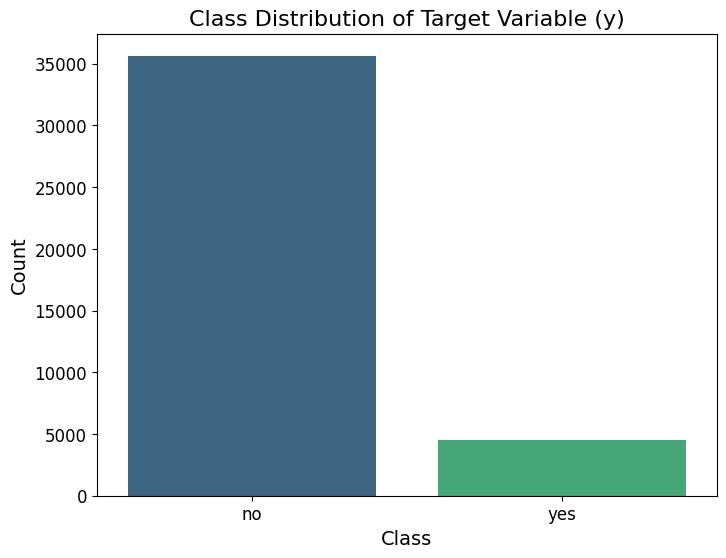

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the class distribution of the target variable (y)
class_counts = data['y'].value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title("Class Distribution of Target Variable (y)", fontsize=16)
plt.xlabel("Class", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

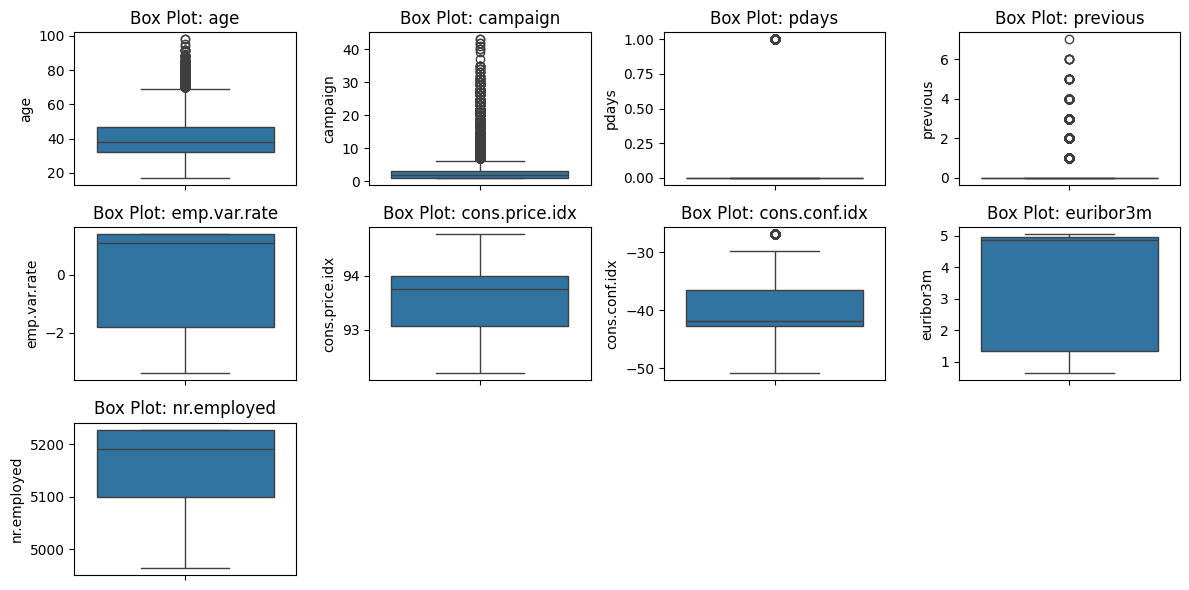


Outliers based on Z-score:
age                362
campaign           849
pdays             1481
previous          1035
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
dtype: int64

Outliers based on IQR:
age                459
campaign          2345
pdays             1481
previous          5486
emp.var.rate         0
cons.price.idx       0
cons.conf.idx      434
euribor3m            0
nr.employed          0
dtype: int64


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming 'data' is your raw dataset before encoding

# Step 1: Identify numeric columns (outliers can only be checked for numeric columns)
numeric_cols = data.select_dtypes(include=[np.number]).columns

# Step 2: Calculate Z-scores to identify outliers
z_scores = np.abs(stats.zscore(data[numeric_cols]))

# Set a threshold for identifying outliers (e.g., Z-score > 3 indicates outlier)
outliers_zscore = (z_scores > 3)

# Step 3: Identify outliers using IQR (Interquartile Range)
Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Outliers are values outside of the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]
outliers_iqr = ((data[numeric_cols] < (Q1 - 1.5 * IQR)) |
                (data[numeric_cols] > (Q3 + 1.5 * IQR)))

# Step 4: Plot box plots for each numeric column to visually inspect for outliers
# Calculate the number of rows and columns needed for subplots based on the number of numeric columns
num_cols = len(numeric_cols)
ncols = 4  # You can adjust this value based on your preference
nrows = (num_cols // ncols) + (num_cols % ncols > 0)  # Ensure we have enough rows to fit all columns

plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols):
    plt.subplot(nrows, ncols, i+1)  # Adjust the number of subplots dynamically
    sns.boxplot(data[col])
    plt.title(f'Box Plot: {col}')
plt.tight_layout()
plt.show()

# Step 5: Summarize the number of outliers based on Z-score
print("\nOutliers based on Z-score:")
print(np.sum(outliers_zscore, axis=0))  # Count of outliers in each column based on Z-score

# Step 6: Summarize the number of outliers based on IQR
print("\nOutliers based on IQR:")
print(np.sum(outliers_iqr, axis=0))  # Count of outliers in each column based on IQR


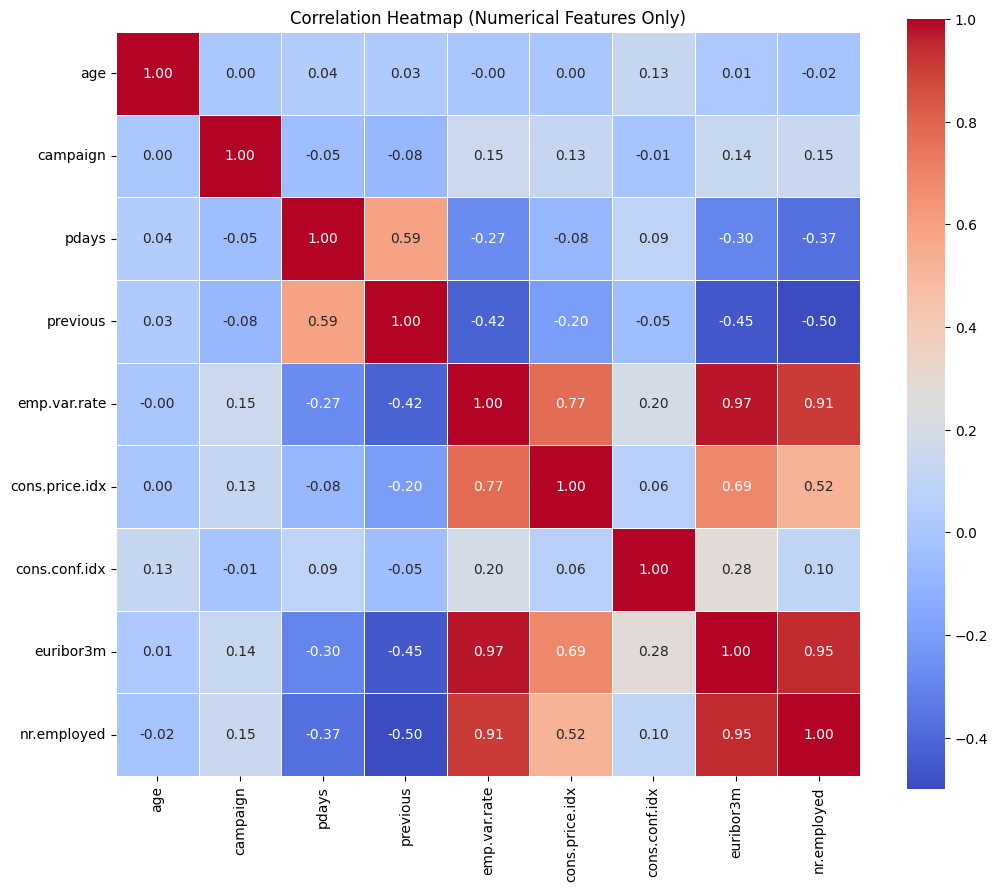

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True)
plt.title('Correlation Heatmap (Numerical Features Only)')
plt.show()

In [27]:
duplicate_rows = data[data.duplicated()]
num_duplicates = duplicate_rows.shape[0]
print(f"Number of duplicate rows: {num_duplicates}")



Number of duplicate rows: 1984


In [42]:
import pandas as pd

# Assuming your data is already loaded into a DataFrame called 'data'

# List of categorical columns
categorical_cols = ['job', 'marital', 'education',  'housing', 'loan',
                    'contact', 'month', 'day_of_week', 'poutcome']

# One-hot encode categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_cols )

# Encode target variable (if necessary)
data_encoded['y'] = data_encoded['y'].map({'no': 0, 'yes': 1})

# Verify the encoded data
print("Shape of Encoded Data:", data_encoded.shape)
print(data_encoded.head())

# Check for non-numeric columns
print(data_encoded.dtypes)


Shape of Encoded Data: (40186, 58)
   age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56         1      0         0           1.1          93.994   
1   57         1      0         0           1.1          93.994   
2   37         1      0         0           1.1          93.994   
3   40         1      0         0           1.1          93.994   
4   56         1      0         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  y  ...  month_oct  month_sep  \
0          -36.4      4.857       5191.0  0  ...      False      False   
1          -36.4      4.857       5191.0  0  ...      False      False   
2          -36.4      4.857       5191.0  0  ...      False      False   
3          -36.4      4.857       5191.0  0  ...      False      False   
4          -36.4      4.857       5191.0  0  ...      False      False   

   day_of_week_fri  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0            False             True         

In [43]:
from imblearn.over_sampling import SMOTE

# Separate features (X) and target variable (y)
X = data_encoded.drop('y', axis=1)
y = data_encoded['y']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Verify the class distribution after SMOTE
print("Class distribution after SMOTE:\n", y_smote.value_counts())


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Class distribution after SMOTE:
 y
0    35654
1    35654
Name: count, dtype: int64


In [44]:
import pandas as pd

# Combine the features and target back into a single DataFrame
smote_data = pd.concat([X_smote, y_smote], axis=1)

# Check the number of duplicates before removal
print("Number of duplicate rows before removal:", smote_data.duplicated().sum())

# Remove duplicate rows
smote_data = smote_data.drop_duplicates()

# Separate features (X) and target variable (y) again after removing duplicates
X_smote_cleaned = smote_data.drop('y', axis=1)
y_smote_cleaned = smote_data['y']

# Check the number of duplicates after removal
print("Number of duplicate rows after removal:", smote_data.duplicated().sum())

# Verify the class distribution after cleaning duplicates
print("Class distribution after removing duplicates:\n", y_smote_cleaned.value_counts())


Number of duplicate rows before removal: 6781
Number of duplicate rows after removal: 0
Class distribution after removing duplicates:
 y
0    33718
1    30809
Name: count, dtype: int64


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

# Assuming X_smote_cleaned and y_smote_cleaned are the updated feature set and target after processing
# Split the cleaned SMOTE data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_smote_cleaned, y_smote_cleaned, test_size=0.2, random_state=42, stratify=y_smote_cleaned
)

# Initialize the Random Forest classifier with adjusted hyperparameters
rf_model = RandomForestClassifier(
    random_state=42,
    n_estimators=500,          # Increased number of estimators for robustness
    max_depth=30,              # Limited depth for better generalization
    min_samples_split=20,      # Minimum samples required to split an internal node
    min_samples_leaf=10,       # Minimum samples required to be at a leaf node
)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Train the model on the full training set
rf_model.fit(X_train, y_train)

# Calculate training accuracy
y_train_pred = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Make predictions on the test set
y_test_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluate the model
print("\nTraining Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("\nAccuracy Score on Test Set:", test_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

# Calculate ROC-AUC score
y_test_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_test_proba)
print("\nROC-AUC Score:", roc_auc)




Cross-Validation Scores: [0.91002421 0.9034289  0.9021697  0.90594731 0.89936071]
Mean CV Accuracy: 0.9041861676828153

Training Accuracy: 0.9224152961004243
Testing Accuracy: 0.9118239578490624

Accuracy Score on Test Set: 0.9118239578490624

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92      6744
           1       0.91      0.90      0.91      6162

    accuracy                           0.91     12906
   macro avg       0.91      0.91      0.91     12906
weighted avg       0.91      0.91      0.91     12906


Confusion Matrix:
 [[6227  517]
 [ 621 5541]]

ROC-AUC Score: 0.9638563765481081


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd

# Split the SMOTE data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote)

# Initialize the Random Forest classifier with adjusted hyperparameters
rf_model = RandomForestClassifier(
    random_state=42,
    n_estimators=500,          # Increased number of estimators for robustness
    max_depth=30,              # Limited depth for better generalization
    min_samples_split=20,      # Minimum samples required to split an internal node
    min_samples_leaf=10,        # Minimum samples required to be at a leaf node

)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Train the model on the full training set
rf_model.fit(X_train, y_train)

# Calculate training accuracy
y_train_pred = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Make predictions on the test set
y_test_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluate the model
print("\nTraining Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("\nAccuracy Score on Test Set:", test_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

# Calculate ROC-AUC score
y_test_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_test_proba)
print("\nROC-AUC Score:", roc_auc)



Cross-Validation Scores: [0.91209465 0.91015865 0.90928215 0.91313875 0.90270839]
Mean CV Accuracy: 0.9094765168787131

Training Accuracy: 0.9281807663990463
Testing Accuracy: 0.9226616182863554

Accuracy Score on Test Set: 0.9226616182863554

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      7131
           1       0.92      0.92      0.92      7131

    accuracy                           0.92     14262
   macro avg       0.92      0.92      0.92     14262
weighted avg       0.92      0.92      0.92     14262


Confusion Matrix:
 [[6592  539]
 [ 564 6567]]

ROC-AUC Score: 0.9694151525861918


## training set only smote

In [30]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
import pandas as pd

# Separate features (X) and target variable (y)
X = data_encoded.drop('y', axis=1)
y = data_encoded['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training set only
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verify the class distribution after SMOTE
print("Class distribution in training set after SMOTE:\n", y_train_smote.value_counts())

# Initialize the Random Forest classifier with adjusted hyperparameters
rf_model = RandomForestClassifier(
    random_state=42,
    n_estimators=400,          # Increased number of estimators for robustness
    max_depth=30,              # Limited depth for better generalization
    min_samples_split=10,      # Minimum samples required to split an internal node
    min_samples_leaf=5,        # Minimum samples required to be at a leaf node
    class_weight="balanced"
)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')  # 5-fold cross-validation

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Train the model on the full training set (after SMOTE)
rf_model.fit(X_train_smote, y_train_smote)

# Calculate training accuracy
y_train_pred = rf_model.predict(X_train_smote)
train_accuracy = accuracy_score(y_train_smote, y_train_pred)

# Make predictions on the test set
y_test_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluate the model
print("\nTraining Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("\nAccuracy Score on Test Set:", test_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

# Calculate ROC-AUC score
y_test_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_test_proba)
print("\nROC-AUC Score:", roc_auc)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Class distribution in training set after SMOTE:
 y
0    28522
1    28522
Name: count, dtype: int64
Cross-Validation Scores: [0.80489088 0.9571391  0.95301955 0.95880445 0.95669705]
Mean CV Accuracy: 0.9261102059261057

Training Accuracy: 0.9516162961924128
Testing Accuracy: 0.8921373475989052

Accuracy Score on Test Set: 0.8921373475989052

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      7132
           1       0.52      0.50      0.51       906

    accuracy                           0.89      8038
   macro avg       0.73      0.72      0.73      8038
weighted avg       0.89      0.89      0.89      8038


Confusion Matrix:
 [[6717  415]
 [ 452  454]]

ROC-AUC Score: 0.8040890696905654
